In [1]:
import numpy as np
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field-old/src/lib')
from lib.lib_tmd_model import setParams
from lib.lib_solvers import solve_self_consistent_k_space
from lib.lib_init_cond import *
from lib.lib_plot import showBandStructure, showGrandpotentialMinimization,\
showMagProf, showWF

# Set the desired parameters

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

Nk : Number of ks

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold: The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [21]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Ny = 8

# Number of k-points used
Nk = 512

# Model parameters
t = 1
U = 20

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 'infty'
betaStart = 0.1
betaSpeed = 1.12
betaThreshold = 50

# Solver parameters
itMax = 50
dampFreq = 1
delta = 1e-8
singleExcitationFreq = itMax + 1
dyn = 'local'

# Initial conditions
seed = 1
nUp, nDown = ferro(2 / 3, nOrb * Ny, seed)

# Show initial condition

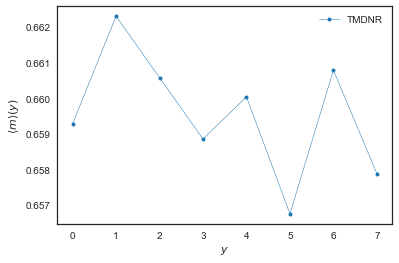

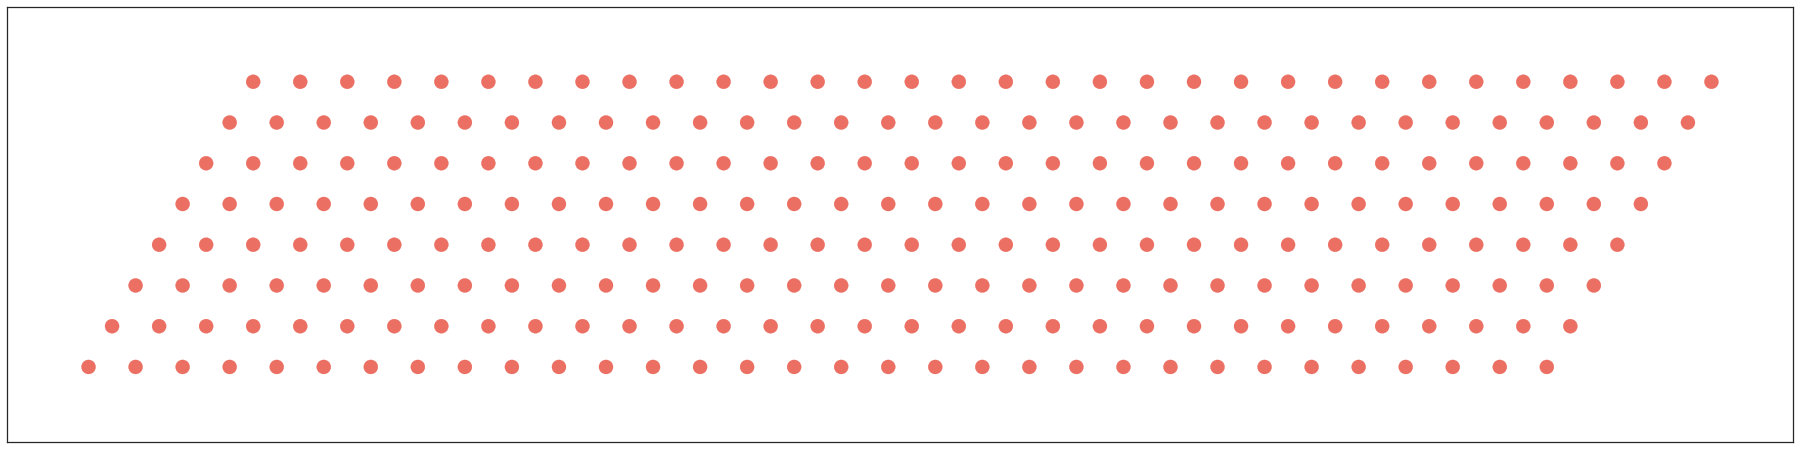

In [22]:
dotscale = 100
longLength = 32
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)

In [23]:
( nUp.sum() + nDown.sum() ) / Ny / nOrb

0.66666666666666685

# Iterative mean field solution

In [24]:
%%time
nUp, nDown, energies,\
bestEnergy, itSwitch, lastIt, mu, abs_t0,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_k_space(abs_t0, e1, e2, t0, t1, t2, t11, t12, t22,\
                                  Nk, Ny, nOrb, nHole,\
                                  invTemp, betaStart, betaSpeed, betaThreshold,\
                                  anneal_or_not, U, itMax, dampFreq, dyn,\
                                  singleExcitationFreq, osc, delta, nUp, nDown)

Started annealing.

Inverse temperature:  0.09999999999999998
0.647174285823
iteration:  0
deltaUp:  0.0369192595532
deltaDown:  1444.94075694
Inverse temperature:  0.22000000000000008
0.678660468916
Inverse temperature:  0.35440000000000016
0.691947226246
Inverse temperature:  0.5049280000000004
0.70183597549
Inverse temperature:  0.6735193600000006
0.707261984773
Inverse temperature:  0.8623416832000007
0.710839676805
Inverse temperature:  1.073822685184001
0.713670025623
Inverse temperature:  1.3106814074060815
0.715926357945
Inverse temperature:  1.5759631762948114
0.717634472317
Inverse temperature:  1.8730787574501893
0.718863685816
Inverse temperature:  2.205848208344212
0.71971501097
iteration:  10
deltaUp:  2.86114527619e-06
deltaDown:  3.09756053961e-06
Inverse temperature:  2.578549993345518
0.720289008779
Inverse temperature:  2.9959759925469807
0.720669027846
Inverse temperature:  3.463493111652619
0.72091750024
Inverse temperature:  3.9871122850509333
0.721078526517
Inver

# Band structure

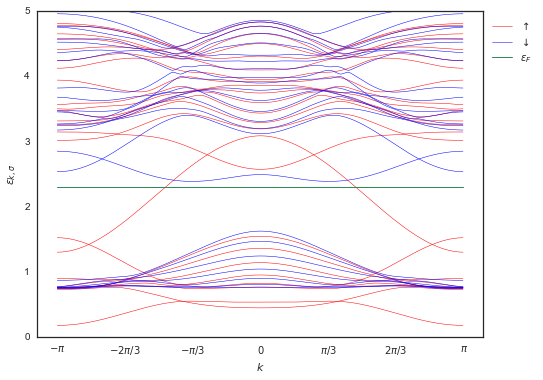

In [25]:
showBandStructure(Nk, abs_t0, eUp, eDown, mu)


# Show solution

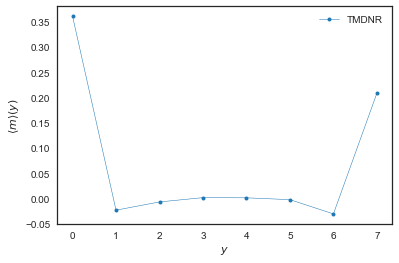

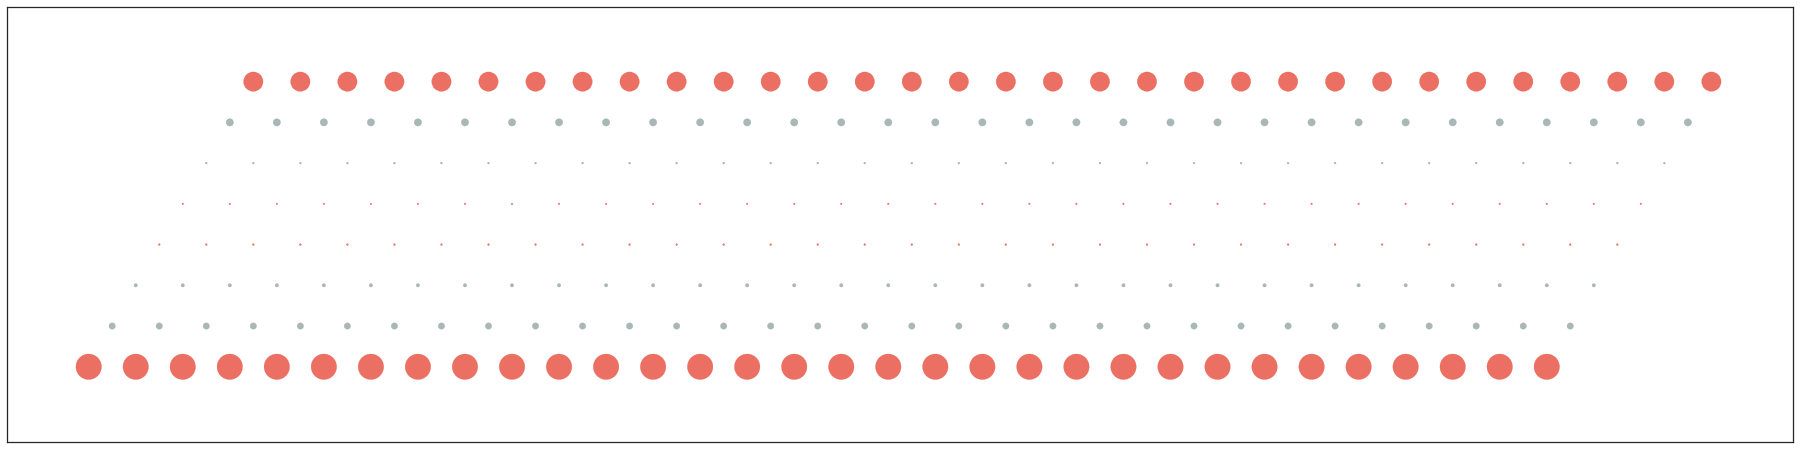

In [26]:
dotscale = 600
longLength = 32
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)


# Grandpotential minimization

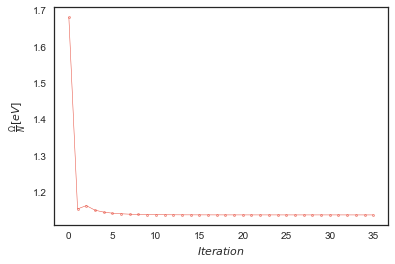

In [27]:
showGrandpotentialMinimization(itSwitch, lastIt, energies)

In [19]:
bestEnergy

1.1380525911728547

In [20]:
( nUp.sum() + nDown.sum() ) / nOrb / Ny

0.64721679689039091

# Edge-states

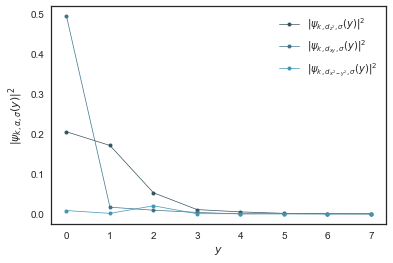

In [11]:
Kpoint = 2
Ktol = 0.5
Eedge = 2.8
Etol = 0.5
showWF(wfUp, wfDown, Nk, Ny, nOrb, Kpoint, Ktol, Eedge, Etol, eUp, eDown, abs_t0)